# Programming for datascience week 4 - Lineare Regressie

### Leerdoelen
- Je leert wat lineaire regressie inhoud en waarom het een voorbeeld van supervised learning is
- Je leert de uitkomst van een lineaire regressie interpreteren
- Je leert verschillende modellen met elkaar vergelijken
- Je leert een keuze maken uit een set aan mogelijk regressie modellen. 
- Je leert hoe je omgaat met categorische variabelen tijdens lineaire regressie
- Je leer waarom je de data moet splitsen in een test en trainingsset
- Je leert een verband te leggen tussen de verschillende resultaten in je analyse: bv het verband tussen correlaties en de uitkomst van je regressie

<div>
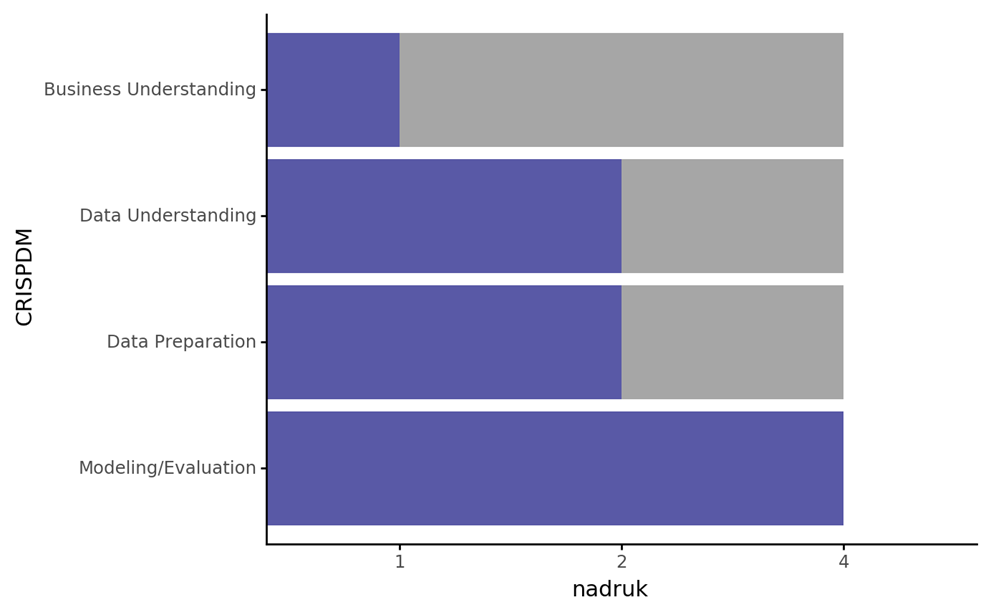
</div>

### Achtergrondinformatie:
- Google naar:
    - `sklearn linear regression`
    - `statsmodels formula interface`
    - `interpret regression coefficients`
    - `linear regression overfitting`
    - `python seaborn pairplot`
    - `pandas generate dummy variables`
    - `sklearn calculate R^2 score`
- Datacamp course `Supervised learning with sci-kit learn: Regression`

### Opdracht 
- Vul het onderstaande notebook aan op de gevraagde plekken. 



# Business Understanding
In het licht van klimaatverandereing en stijgende brandstofprijzen wordt het brandstofverbruik van een auto wordt een steeds belangerijker onderdeel van de keuze van een auto. Maar het is voor een consument lastig in te schatten of het brandstofverbruik van een auto goed is ten opzichte van andere vergelijkbare auto's. In deze analyse gaan we een regressiemodel bouwen waarbij we brandstofverbruik gaan voorspellen op basis van de eigenschappen van een set aan auto's (gewicht, aantal versnellingen, etc). Nadat we dit model gebouwd hebben kunnen we van een onbekende auto zeggen of het verbruik in de lijn der verwachting is gegeven zijn eigenschappen. 

- Begrijp je de vraag die gesteld wordt? 
- Heb je voldoende kennis van het domein (auto’s) om de data te kunnen begrijpen?


# Data Understanding 

1. In welk format is de data (aangeleverd)? 
2. Hoe kun je de databron benaderen vanuit python?
3. Data exploreren:
       a. Informatie over de database
        - Welke tabellen (evt. collections) staan er in de database?
        - Welke kolommen (variabelen) vinden we terug in elke tabel? Kun je aan elke kolom betekenis geven??
        - Wat is het aantal records per tabel?
        - Welke datatypes vinden we terug in de tabellen?
        - Zijn er lege cellen?
       b. Vul dit evt. aan met beschrijvende statistiek, kijk alvast vooruit naar het regressiemodel
       c. Visualiseer de data op een slimme manier, kijk alvast vooruit naar het regressiemodel
       d. [NIEUW] Zijn alle variabelen van nominaal of ratio meetniveau? Welke invloed heeft dit op de volgende stappen?
       e. [NIEUW] Welk type regressiemodel is waarschijnlijk geschikt om de verbanden te onderzoeken?

Korte uitleg bij de variabelen:
- `model`, de naam van de auto
- `mpg`, het verbruik van de auto in miles-per-gallon (mile = 1.6 km, gallon = 4l benzine)
- `cyl`, het aantal cyllinders van de auto
- `disp`, verplaatsing
- `hp`, het aantal pk van de auto
- `drat`, ratio van de achteras
- `wt`, het gewicht van de auto (1000 kg)
- `qsec`, hoe lang het duurt om 1/4 mile te rijden vanuit stilstand.
- `vs`, motor met eenr echte vorm of een V-vorm
- `am`, automatische versnelling of niet (1 wel, 0 niet)
- `gear`, het aantal versnellingen
- `carb`, aantal carburateurs. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Handige Jupyter magic
%config IPCompleter.greedy = True
%matplotlib inline


                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
model                                                                        
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
model                    
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2  


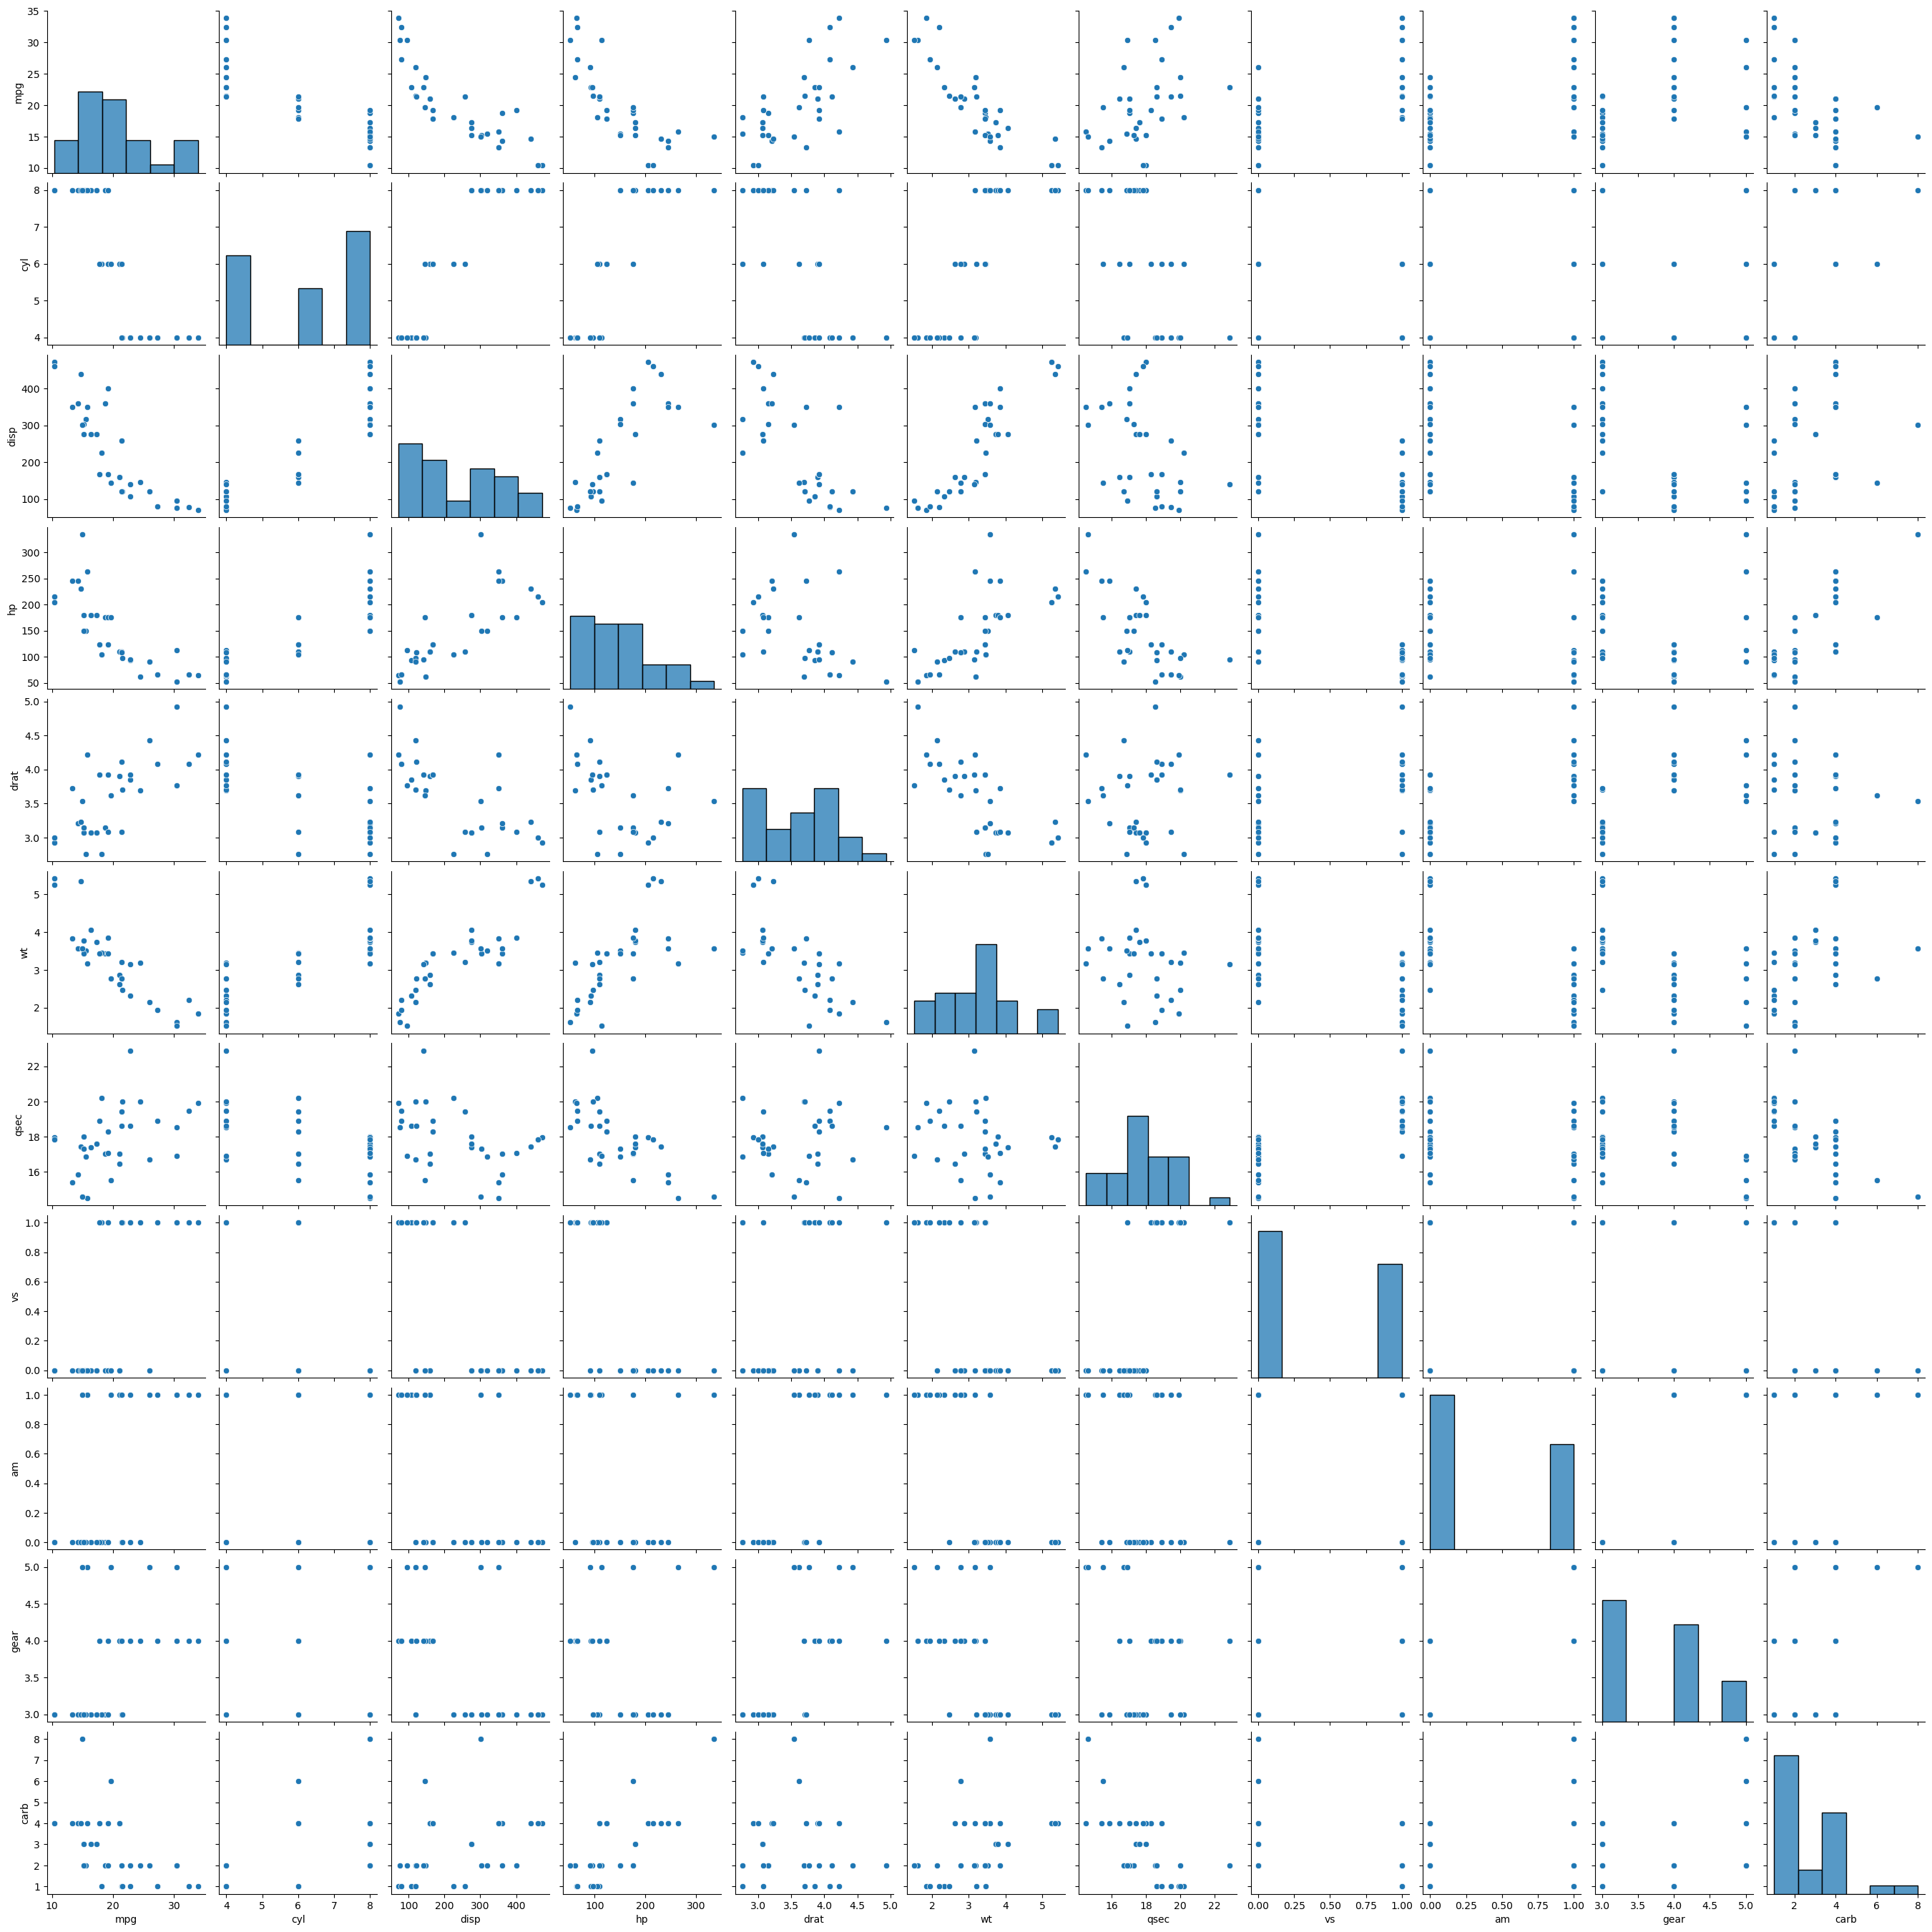

In [4]:
#[10 min] Geef hieronder de code om de data te importeren, beschrijf de data, en maak een pairplot (zie stap a, b, en c).
#beantwoord de onderstaande vraag
#TIP: pas het aantal cellen aan naar de hoeveekheid die jij nodig hebt
mtcars = pd.read_csv('mtcars.csv').set_index('model')
print(mtcars.head())

sns.pairplot(mtcars)




**Wat kun je afleiden uit de soms wat afwijkende vorm van de pairplots (bijv cyl, 2e rij)?**



Dat de variatie klein is, er zijn maar enkele vaste mogelijkheden. Er zijn veel terugkerende gelijke waarden

Het onderstaande pairplot laat het scatterplot zien van mpg versus de andere niet-categorische variabelen. Om de verbanden beter inzichtelijk te maken is een  regressielijn toegevoegd.

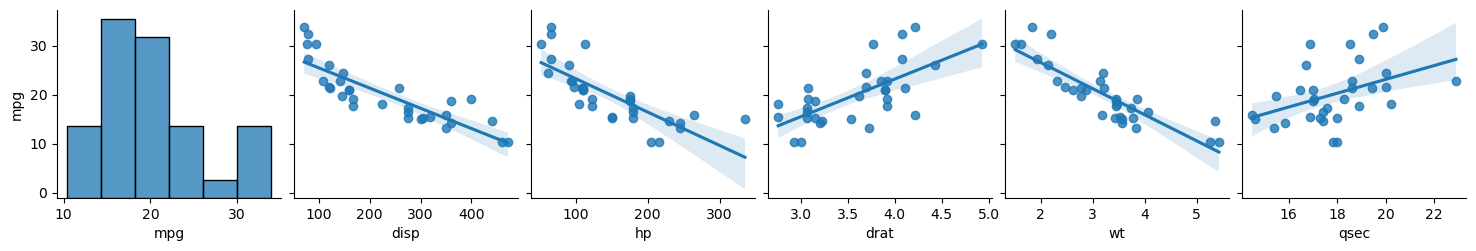

In [5]:
# [10 min] gebruik een pairplot om een serie scatterplots te maken van `mpg` vs 
# de niet categorische variabelen ['disp', 'hp', 'drat', 'wt', 'qsec'] (zie stap c)
# voeg een regressielijn toe aan het pairplot
# beantwoord onderstaande vraag!
non_cat_vars = mtcars.drop(columns=['cyl', 'vs', 'am', 'gear', 'carb'])
sns.pairplot(non_cat_vars, kind='reg', y_vars='mpg')


Hier vallen de volgende zaken op:

**Vul dit stuk aan: geef een lijst met zaken die je opvallen. Richt je hier op het aangeven of de verschillende variabelen wel of niet een verband hebben met de afhankelijke feature `mpg`**


We kijken nu verder naar de samenhang tussen de verschillende variabelen

<AxesSubplot:>

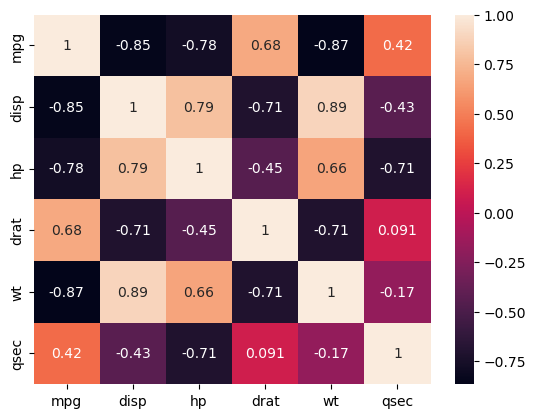

In [6]:
# [5 min] Gebruik een heatmap om de correlaties tussen alle variabelen te onderzoeken en beantwoord onderstaande vraag:
sns.heatmap(non_cat_vars.corr(), annot=True)

Vul dit stuk aan: wat zijn relevante en/of opvallende correlaties?


# Modeling

## Enkelvoudig regressiemodel
We beginnen met het maken van een serie aan enkelvoudige modellen: tussen `wt` en `qsec` aan de ene kant en `mpg` aan de andere kant. 

**Denk na: Welke van de bovenstaande variabelen zijn de afhankelijke en de onafhankelijke variabelen? Leg het verschil uit aan je collega**. 

In [7]:
# [20 min] Bouw hier twee regressiemodellen: `mpg vs wt` en `mpg vs qsec`
# Print de summary en geef antwoord op onderstaande vragen
import statsmodels.formula.api as smf

modWt = smf.ols(formula='mpg ~ wt', data=non_cat_vars).fit()
print(modWt.summary())

modQsec = smf.ols(formula='mpg ~ qsec', data=non_cat_vars).fit()
print(modQsec.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           1.29e-10
Time:                        12:28:04   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2851      1.878     19.858      0.0

**Vul dit stuk aan: geef een interpretatie van de coefficienten van de twee modellen en de R^2 scores. Welk model is beter**



De waarde voor R^2 en de coefficienten van het model mpg ~ wt zijn hoger dan die van mpg ~ qsec en dus is het model beter.

Nu geeft Statsmodels per onafhankelijke variabele aan of deze wel of niet een significant effect op de afhankelijke variabelen hebben (P>|t|). 

Heeft de variabele `wt` hier een significant effect op `mpg`? 

Heeft de variabele `qsec` hier een significant effect op `mpg`? 

**Vul hier je antwoord in**


## Les 2: Meervoudig model 
We kunnen met regressie ook meerdere variabelen uitvoeren om een nog beter model te maken: 

In [15]:
# [5 min] Maak hier met statmodels een meervoudig model met zowel `wt` als `qsec` als onafhankelijke variabelen,
# print de summary en geef antwoord op de onderstaande vragen

modWtQsec = smf.ols(formula='mpg ~ wt + qsec', data=non_cat_vars).fit()
print(modWtQsec.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     69.03
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           9.39e-12
Time:                        12:28:40   Log-Likelihood:                -74.360
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.7462      5.252      3.760      0.0

In dit model spelen dus zowel `wt` als `qsec` samen een rol. De interpretatie van de resultaten is:

**vul hier je antwoord in**


## Toevoegen van categorische variabelen
Tot nu toe hebben we alleen gewerkt met numerieke variabelen. In de praktijk werken we ook veel met categorische variabelen. Voorbeelden hiervan in de `mtcars` dataset zijn `cyl` en `am`, zoals we bij de data exploratie in de scatterplots hadden gezien. 
Als we deze variabelen nu in het regressie model zouden stoppen interpreteert Python deze simpelweg als een getal. Dit levert wat problemen op, een auto kan bijvoorbeeld geen 3.5 cillinders hebben. 

In de formule interface van statsmodels kun je dit simpelweg doen door `C(naam_van_var)` in de formule te gebruiken. Als we een model met `wt`, `qsec` en `cyl` maken zien we dat:

In [9]:
# (10 min) Maak een meervoudig regressie model waarin je `wt`, `qsec` en `cyl` meeneem.
#          Bedenk dat cyl een categorie is. Print de summary van dit model. 

het aantal cillinders een verlagend effect heeft op het aantal miles wat je uit een gallon brandstof haalt. Via de dummy variable kom je dan uit op een correctiefactor per aantal cillinders: voor 8 cillinders is dit 3.7 miles minder per gallon brandstof, voor 6 cillinders 3.1 miles minder per gallon brandstof en voor 4 cillinders 0 miles minder per gallon brandstof. Dat je voor 4 cillinders dus geen correctie hebt in in lijn met wat we eerder zagen: je hebt maar 2 dummy variabelen nodig voor drie levels (4, 6, 8 cillinders). 

Het model met het aantal cillinders wordt maar een klein beetje beter qua verklaarde variantie. Het is dus nog maar de vraag of het toevoegen van `cyl` echt zin heeft. Dit is in tegenspraak met onze eerder observatie uit het boxplot, die suggereerde een vrij sterk verband. Dit kan verklaard worden door een correlatie tussen de onafhankelijke variabelen: zware auto's hebben meer cillinders. Dit kunnen we verder verkennen door een boxplot:  

In [10]:
#[3 min maak] een boxplot van 'wt' per 'cyl'


Je ziet hier dat het gewicht bijna lineair stijgt met het aantal cylinders. In dit geval voegt het aantal cillinders dus niet zoveel meer toe aan het model omdat de informatie al versleuteld zit in `wt`. 

## Modelkeuze rekeninghoudend met overfitting
Je kunt een model steeds verder en verder blijven uitbreiden met meer variabelen om het model nog beter te maken. Een issue waar je hier tegenaan kan lopen wordt overfitting genoemd: het model wordt zo sterk op een specfieke situatie gericht dat het niet meer in andere situaties bruikbaar is. Dit maakt het model onbruikbaar in een praktische setting met onbekende data. 

Tot nu toe hebben we dezelfde data gebruikt om het model te fitten als ook om het model te beoordelen. Dit werkt overfitting in de hand, het model heeft een oneerlijke voorsprong doordat het de data al kent die het gaat voorspellen. 

Een methode om dit tegen te gaan is om de data te splitsen in een trainings- en een testset:

In [11]:
# [5 min] splits je dataset in twee delen: 70% training, 30% test gebruik random_state =84 
# en de volgende naamgeving voor de variabelen: indep_vars_train, indep_vars_test, mpg_train, mpg_test
# Gebruik de functie train_test_split uit sklearn
# ! Let erop dat je de data weer aan elkaar moet plakken voor statsmodels

Nu kunnen de de `train` data gebruiken om het model te maken, en de `test` data om de performance te bepalen:

In [12]:
# [20 min]
# Bepaal de RMSE van `mpg ~ wt`, `mpg ~ wt + qsec`, `mpg + wt + C(cyl)`. Doe dit op twee manieren:
#  - RMSE van trainingsdata met model predictie
#  - RMSE van testdata met model predictie
# Note: statsmodels bevat een functie die de RMSE voor je kan uitrekenen

In [13]:
# [10 min] 
# Maak nu een plot met op de x-as welk model het is, en op de Y-as de RMSE. Zorg ervoor dat 
# er twee lijnen in de grafiek staan: eentje voor de RMSE training en eentje voor de RMSE test. 

Een aantal zaken vallen hier op:

- De RMSE bepaald met de train data neemt gestaag af, waarbij een lage RMSE een goed model impliceert. Maar als we naar de RMSE bepaald op de testdata kijken dan krijgen we een heel ander beeld. Het toevoegen van `cyl` aan het model voegt niet meer veel performance toe, het verlaagd de performance zelfs een beetje. Hier kun je duidelijk zien dat het toevoegen van `cyl` het model overfit aan de trainingsdata. 
- Het model met `wt` en `qsec` geeft op basis van onze testdataset de beste resultaten. Al moeten we gezien de omvang van de dataset nog wel een slag om de arm houden.

# Evaluation
Nu we een model hebben kunnen we voor de test dataset voorspellen hoeveel we verwachten dat deze auto's verbruiken. Als we daarna het verschil uitrekenen met het daadwerkelijke verbruik:

In [14]:
predicted=model_wt_q.predict(indep_vars_test)
residuals = mpg_test - predicted
residual_data = pd.DataFrame({'mpg': mpg_test, 'residual': residuals, 'model': indep_vars_test['model']})
residual_data.plot(x='mpg', y='residual', kind='scatter')
residual_data

NameError: name 'model_wt_q' is not defined

zien we dat binnen de testset de Toyota Corolla 5.8 miles per gallon meer rijdt dat je zou verwachten op basis van ons model met `const`, `wt` en `qsec`. Gegeven ons model heeft deze auto dus een zeer goed verbruik. Qua verbruik in zijn klasse is een Corolla dus een goede keuze.